In [477]:
import matplotlib.pyplot as plt

#can't change font sizes in pie charts = need to change default font size in here

import matplotlib as mpl

import numpy as np
import pandas as pd
import statistics

#numpy stats
import scipy.stats as sts
%matplotlib inline

In [478]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


In [479]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [480]:
ride_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12


In [481]:
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [482]:
ride_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [483]:
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [484]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [485]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [486]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [487]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [488]:
sum(city_df["type"]=="Urban")

66

In [489]:
sum(city_df["type"]=="Rural")

18

In [490]:
sum(city_df["type"]=="Suburban")

36

In [491]:
pyber_df=pd.merge(ride_df, city_df,how="left", on=["city", "city"] )

In [492]:
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4.256850e+12,4,Rural


In [538]:
#create 3 data frames, one for each type of city
urban_df = pyber_df[pyber_df["type"]=="Urban"]
rural_df = pyber_df[pyber_df["type"]=="Rural"]
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]

urban_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25,39.40,9.070690e+12,67,Urban
1621,Christopherfurt,2019-03-13 1:47,32.05,2.788820e+12,41,Urban
1622,Raymondhaven,2019-03-20 2:20,38.53,8.658260e+12,11,Urban
1623,Port Johnbury,2019-03-26 7:22,7.63,8.089280e+12,3,Urban


In [494]:
#get the ride count for each city 
urban_ride_count = urban_df.groupby(["city"]).count()["fare"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["fare"]
rural_ride_count = rural_df.groupby(["city"]).count()["fare"]

In [495]:
#get the average fare for city
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [539]:
#get the number of drivers for each city

urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12
Barajasview            26
Carriemouth            52
Christopherfurt        41
Deanville              49
                       ..
West Patrickchester    25
West Robert            39
West Samuelburgh       73
Williamsstad           59
Williamsview           46
Name: driver_count, Length: 66, dtype: int64

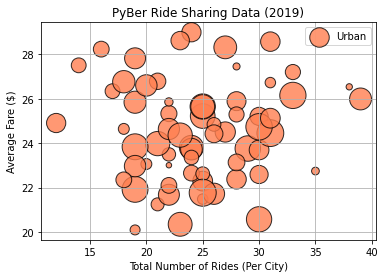

In [497]:
#urban plot

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color = "coral", 
            alpha = 0.8, label = "Urban", linewidths=1, edgecolor="black")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend()
plt.grid()
plt.show()


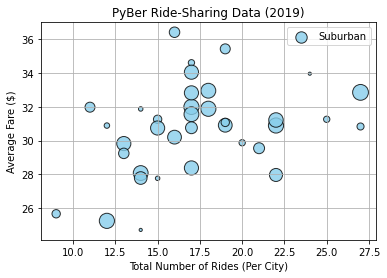

In [498]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

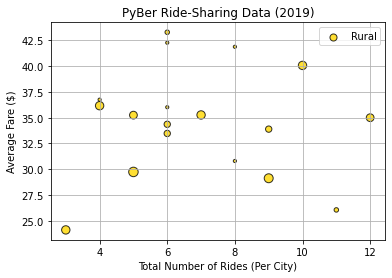

In [499]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

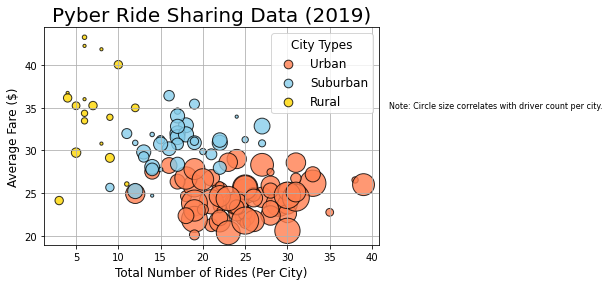

In [500]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color = "coral", 
            alpha = 0.8, label = "Urban", linewidths=1, edgecolor="black")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="8")
plt.savefig("analysis/Fig1.png")

In [501]:
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [502]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [503]:
suburban_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [504]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: fare, dtype: float64

In [505]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: fare, dtype: float64

In [506]:
suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: fare, dtype: float64

In [507]:
round(urban_ride_count.mean(),1), round(suburban_ride_count.mean(),1), round(rural_ride_count.mean(),1)

(24.6, 17.4, 6.9)

In [508]:
urban_ride_count.median()

24.0

In [509]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [510]:
suburban_ride_count.mode()

0    17
dtype: int64

In [511]:
#numpy stats

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'Urban ride count mean is: {mean_urban_ride_count:.2f}.')


median_suburban_ride_count = np.median(suburban_ride_count)
print(f'Suburban ride count median is: {median_suburban_ride_count:.2f}.')


Urban ride count mean is: 24.62.
Suburban ride count median is: 17.00.


In [537]:
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares=rural_df["fare"]

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [513]:
mean_urban_fares = np.mean(urban_fares)
print(f'Mean urban fares is: {mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'Median urban fares is: {median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f"Mode urban fare is: {mode_urban_fares}.")

Mean urban fares is: 24.53.
Median urban fares is: 24.64.
Mode urban fare is: ModeResult(mode=array([22.86]), count=array([5])).


In [514]:
urban_drivers=urban_df["driver_count"]
rural_drivers=rural_df["driver_count"]
suburban_drivers=suburban_df["driver_count"]

In [515]:
#urban driver count 

urban_driver_mean= np.mean(urban_drivers)
print(f'Urban driver mean is: {urban_driver_mean:.2f}.')
urban_driver_median = np.median(urban_drivers)
print(f'Urban driver median is: {urban_driver_median:.2f}.')
urban_driver_mode = sts.mode(urban_drivers)
print(f'Urban Driver Mode is: {urban_driver_mode}.')

#suburban driver count 
suburban_driver_mean= np.mean(suburban_drivers)
print(f'Suburban driver mean is: {suburban_driver_mean:.2f}.')
suburban_driver_median = np.median(suburban_drivers)
print(f'Suburban driver median is: {suburban_driver_median:.2f}.')
suburban_driver_mode = sts.mode(suburban_drivers)
print(f'Suburban Driver Mode is: {suburban_driver_mode}.')

#rural driver count 
rural_driver_mean= np.mean(rural_drivers)
print(f'Rural driver mean is: {rural_driver_mean:.2f}.')
rural_driver_median = np.median(rural_drivers)
print(f'Rural driver median is: {rural_driver_median:.2f}.')
rural_driver_mode = sts.mode(rural_drivers)
print(f'Rural Driver Mode is: {rural_driver_mode}.')

Urban driver mean is: 36.68.
Urban driver median is: 37.00.
Urban Driver Mode is: ModeResult(mode=array([39], dtype=int64), count=array([86])).
Suburban driver mean is: 13.71.
Suburban driver median is: 16.00.
Suburban Driver Mode is: ModeResult(mode=array([20], dtype=int64), count=array([79])).
Rural driver mean is: 4.30.
Rural driver median is: 4.00.
Rural Driver Mode is: ModeResult(mode=array([1], dtype=int64), count=array([32])).


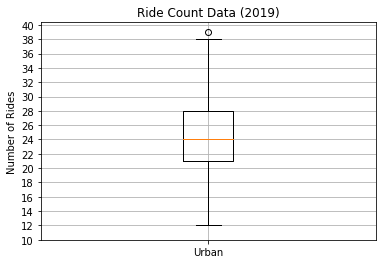

In [516]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

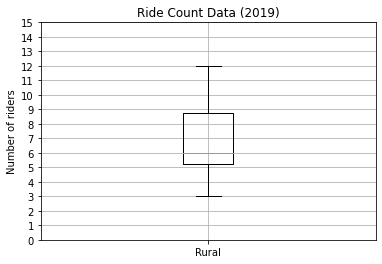

In [517]:
#box and whiser - rural

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of riders")
ax.set_yticks(np.arange(0,16,step=1.0))
ax.grid()

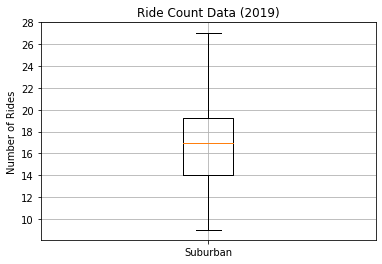

In [518]:
# Create a box-and-whisker plot for the sub-urban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()
plt.show()

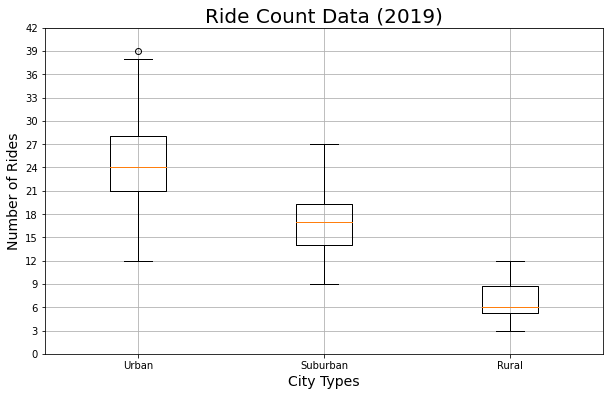

In [519]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [520]:
#get the city that matches ride count of 39

urban_ride_count_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'City with the highest ride count is: {urban_ride_count_outlier}.')

City with the highest ride count is: West Angela.


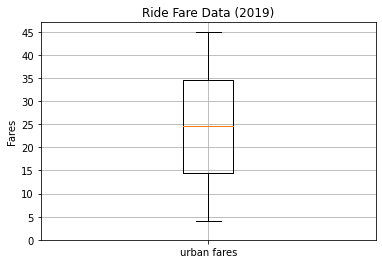

summary statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [521]:
#box and whisker plot for urban fares

x_labels = ["urban fares"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares")
ax.set_yticks(np.arange(0,50, step=5.0))
ax.grid()
plt.show()
print("summary statistics")
urban_fares.describe()



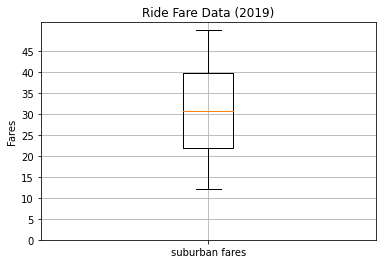

summary statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [522]:
#box and whisker plot for suburban fares

x_labels = ["suburban fares"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares")
ax.set_yticks(np.arange(0,50, step=5.0))
ax.grid()
plt.show()
print("summary statistics")
suburban_fares.describe()

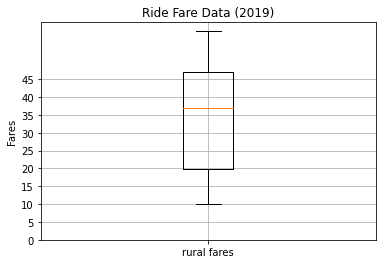

summary statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [523]:
#box and whisker plot for suburban fares

x_labels = ["rural fares"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares")
ax.set_yticks(np.arange(0,50, step=5.0))
ax.grid()
plt.show()
print("summary statistics")
rural_fares.describe()

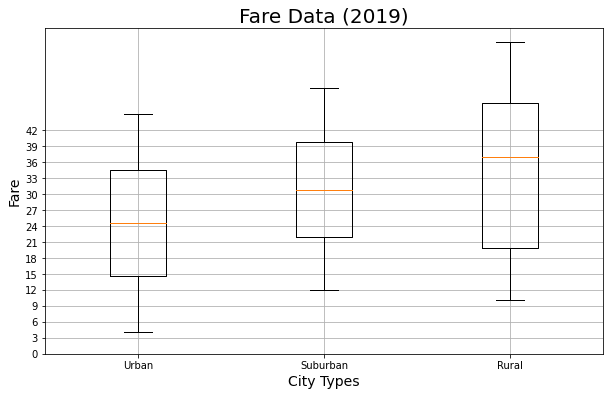

In [524]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

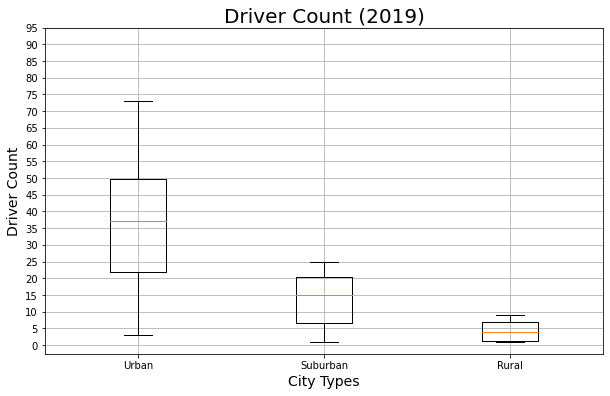

In [525]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count (2019)',fontsize=20)
ax.set_ylabel('Driver Count',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 100, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [526]:
#get the sum of fares by city type
sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [527]:
total_fares = sum_fares_by_type.sum()

In [528]:
type_percents = sum_fares_by_type/total_fares*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

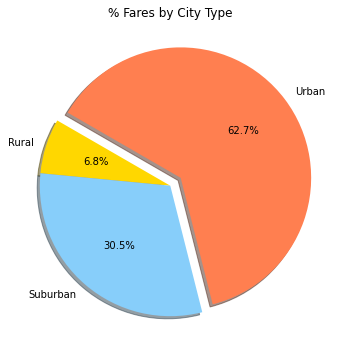

In [529]:
plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels =["Rural", "Suburban", "Urban"], colors = ["gold", "lightskyblue", "coral"], 
        explode = [0, 0, 0.1], autopct = '%1.1f%%', shadow = True, startangle = 150)
plt.title("% Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/fig5.png")

plt.show()


In [530]:
# total rides by city type

rides_by_citytype = pyber_df.groupby(["type"]).count()["ride_id"]
ride_percent_bycitytype = rides_by_citytype/rides_by_citytype.sum()*100

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

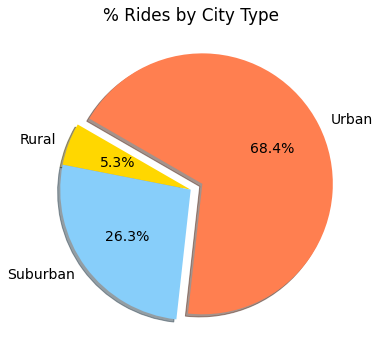

In [531]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percent_bycitytype, labels =["Rural", "Suburban", "Urban"], colors = ["gold", "lightskyblue", "coral"], 
        explode = [0, 0, 0.1], autopct = '%1.1f%%', shadow = True, startangle = 150)
plt.title("% Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/fig6.png")
plt.show()

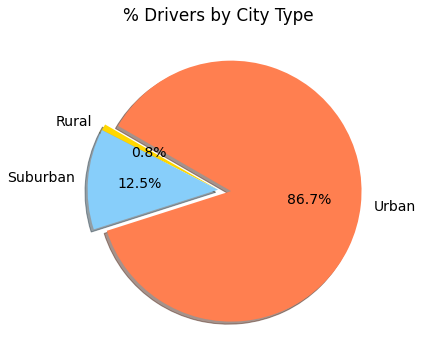

In [536]:
#total drivers for each city type
total_drivers_bycitytype = pyber_df.groupby(["type"]).sum()["driver_count"]
driver_percent_bycitytype = total_drivers_bycitytype/total_drivers_bycitytype.sum()*100

plt.subplots(figsize=(10,6))
plt.pie(driver_percent_bycitytype, labels =["Rural", "Suburban", "Urban"], colors = ["gold", "lightskyblue", "coral"], 
        explode = [0, 0, 0.1], autopct = '%1.1f%%', shadow = True, startangle = 150)
plt.title("% Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/fig7.png")
plt.show()